#  **California Housing Prices Analysis**

##  **`Project Overview`**
This Jupyter Notebook provides a detailed step-by-step analysis of the **California Housing Prices** dataset. 
We explore the dataset, perform statistical analysis, visualize data trends, and apply different machine learning models for house price prediction.

---


In [ ]:
#  Install Required Packages (Run this only once)
!pip install pandas seaborn matplotlib scikit-learn

In [ ]:
#  Importing Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


##  **Step 1: Load the Dataset**
We will load the **California Housing Prices** dataset from an online source and display the first few rows.


In [ ]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [ ]:
# Display the first five rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##  **Step 2: Display Data Types**
We check the data types of each column to understand the dataset better.

In [6]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


##  **Step 3: Data Cleaning & Statistical Summary**
We check for missing values, drop them, and then generate a summary of the dataset.

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Display statistical summary
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##  **Step 4: Count Unique House Values for 'total_rooms'**
We count the number of houses with unique total room values using `value_counts()`.

In [9]:
house_counts = df['total_rooms'].value_counts().to_frame()
house_counts.head()

,total_rooms
1527.0,18
1582.0,17
1613.0,17
2127.0,16
1607.0,15


##  **Step 5: Boxplot - House Prices & Ocean Proximity**
We use a **boxplot** to analyze house prices based on their proximity to the ocean.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31948\297499867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette="coolwarm")
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

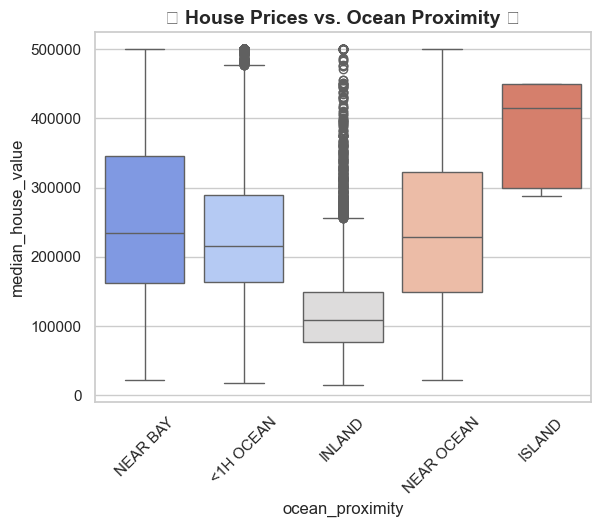

In [10]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette="coolwarm")
plt.title("🏠 House Prices vs. Ocean Proximity 🌊", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

##  **Step 6: Regression Plot - Income vs. House Value**
We check the correlation between **median income** and **house prices** using `regplot`.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128176 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarn

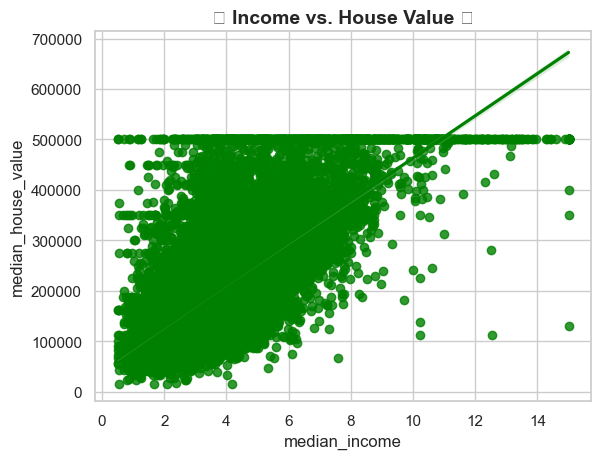

In [11]:
sns.regplot(x='median_income', y='median_house_value', data=df, color='green')
plt.title("💰 Income vs. House Value 📉", fontsize=14, fontweight='bold')
plt.show()

##  **Step 7: Linear Regression with 'median_income'**
We train a **simple linear regression model** using `median_income` as the independent variable.


In [12]:
X = df[['median_income']]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("🔹 R^2 Score:", r2_score(y_test, y_pred))

🔹 R^2 Score: 0.47196228574894983


##  **Step 8: Multi-Feature Linear Regression**
We train a **multiple linear regression model** using several features.

In [14]:
features = ['median_income', 'total_rooms', 'housing_median_age', 'population']
X = df[features]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("🔹 Multi-Feature R^2 Score:", r2_score(y_test, y_pred))

🔹 Multi-Feature R^2 Score: 0.5171837519405795


##  **Step 9: Polynomial Regression with Pipeline**
We build a **pipeline** that scales data, applies a polynomial transformation, and trains a regression model.

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

In [17]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("🔹 Polynomial Regression R^2 Score:", r2_score(y_test, y_pred))

🔹 Polynomial Regression R^2 Score: 0.5449671756612919


##  **Step 10: Ridge Regression**
We train a **Ridge Regression model** with a regularization parameter of `0.1`.

In [18]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("🔹 Ridge Regression R^2 Score:", r2_score(y_test, y_pred))

🔹 Ridge Regression R^2 Score: 0.5171837447559351


---
#  **`Conclusion`**
✅ **Explored & visualized** California housing data  
✅ **Trained regression models** for house price prediction  
✅ **Applied polynomial regression & Ridge regression** to improve accuracy  

This project provides insights into **house price prediction** using multiple machine learning techniques. 